In [37]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [39]:
# Carregando os dados
url = '/content/drive/MyDrive/IA_SPRINT 2/Perfil de Clientes.xlsx'
dt = pd.read_excel(url)

In [42]:
# Exibindo as primeiras linhas e informações gerais dos dados
print(dt.head())
print(dt.info())

   Idade Faixa idade     Gênero   Estado onde mora UF onde mora  \
0     36       35-39  Masculino     Santa Catarina           SC   
1     32       30-34  Masculino             Paraná           PR   
2     21       17-21  Masculino  Rio Grande do Sul           RS   
3     39       35-39  Masculino     Rio de Janeiro           RJ   
4     33       30-34  Masculino     Rio de Janeiro           RJ   

  Região onde mora             Nível de Ensino  \
0              Sul               Pós-graduação   
1              Sul               Pós-graduação   
2              Sul  Não tenho graduação formal   
3          Sudeste  Não tenho graduação formal   
4          Sudeste               Pós-graduação   

                                    Área de Formação  \
0                                 Outras Engenharias   
1  Computação / Engenharia de Software / Sistemas...   
2  Computação / Engenharia de Software / Sistemas...   
3                                             Outras   
4  Computação / 

In [43]:
# Separar as variáveis preditoras (X) e a variável alvo (y)
X = dt.drop(columns=['Comprou'])
y = dt['Comprou']

In [44]:
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Definindo o tratamento para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Preenche valores faltantes com a média
    ('scaler', StandardScaler())  # Padroniza os valores
])

# Definindo o tratamento para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Preenchendo valores ausentes com 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificação one-hot das variáveis categóricas
])

In [45]:
# Pipeline completo para o pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Variáveis numéricas
        ('cat', categorical_transformer, categorical_features)  # Variáveis categóricas
    ])

In [46]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Treinando o modelo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Idade',
                                                   'Finalidade Profissional',
                                                   'Finalidade Acadêmica',
                                                   'Finalidade '
                                                   'Entreterimento']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Faixa idade', 'Gênero',
                                                   'Estado onde mora',
                                                   'UF onde mora',
                                                   'Região onde mora',
                                                   'Nível de Ensino',
                                                   'Área de Formação',
                                                   'Situação atual de trabalho',
                                                   'Setor', 'Faixa salarial',
                                                   'Forma de trabalho'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [48]:
# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

In [49]:
# Avaliar a acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

Acurácia: 0.49


Matriz de Confusão


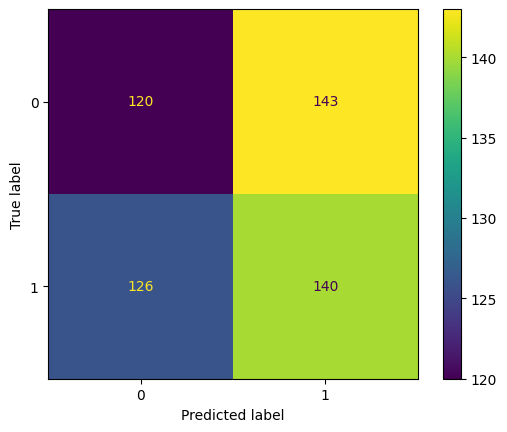

In [50]:
# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=clf.named_steps['classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.named_steps['classifier'].classes_)
disp.plot()

In [51]:
# Obter a importância das características do modelo
feature_names = numeric_features + list(clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
importances = clf.named_steps['classifier'].feature_importances_

In [60]:
# Criar um DataFrame com a importância de cada característica
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # Manter as outras colunas como estão
)

# Treinando o modelo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)

# Avaliando o modelo
y_pred = clf.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

Acurácia: 0.09168241965973535


In [62]:
# Novo perfil de cliente
novo_cliente = {
    'Idade': 30,
    'Faixa idade': '30-34',
    'Gênero': 'Masculino',
    'Estado onde mora': 'São Paulo (SP)',
    'UF onde mora': 'SP',
    'Região onde mora': 'Sudeste',
    'Nível de Ensino': 'Graduação completa',
    'Área de Formação': 'Computação / Engenharia de Software / Sistemas de Informação',
    'Situação atual de trabalho': 'Empregado (CLT)',
    'Setor': 'Tecnologia',
    'Gestor?': 'Não',
    'Cargo Atual': 'Desenvolvedor',
    'Nível': 'Pleno',
    'Faixa salarial': 'de R$ 5.001/mês a R$ 8.000/mês',
    'Profissional': 1,
    'Acadêmico': 1,
    'Entretenimento': 1,
    'Forma de trabalho': 'Modelo híbrido flexível (o funcionário tem flexibilidade para escolher os dias de trabalho presencial)'
}

# Convertendo o novo cliente em DataFrame e aplicando get_dummies
novo_cliente_df = pd.DataFrame([novo_cliente])
novo_cliente_df = pd.get_dummies(novo_cliente_df)

# Garantir que as colunas sejam as mesmas que no treino (alinhamento)
novo_cliente_df = novo_cliente_df.reindex(columns=X_train.columns, fill_value=0)

# Fazer previsão
probabilidade = clf.predict_proba(novo_cliente_df)[0][1]
print(f'Probabilidade de compra: {probabilidade * 100:.2f}%')


Probabilidade de compra: 51.63%


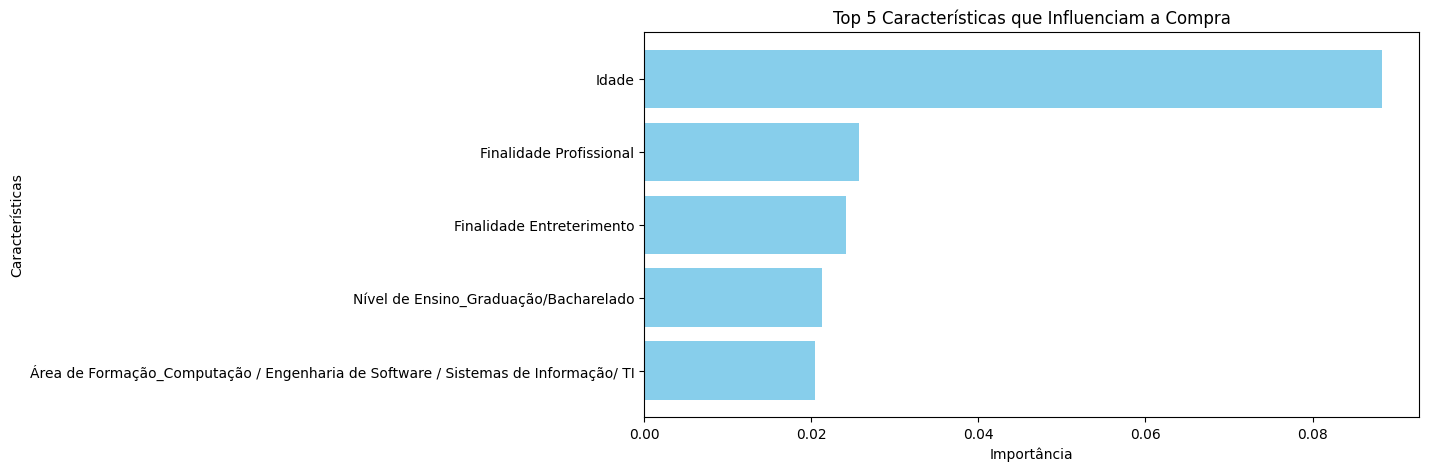

In [63]:
# Selecionar as 5 características mais importantes
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

# Plotar a importância das características
plt.figure(figsize=(10, 5))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Top 5 Características que Influenciam a Compra')
plt.gca().invert_yaxis()  # Inverter ordem das características para facilitar a leitura
plt.show()


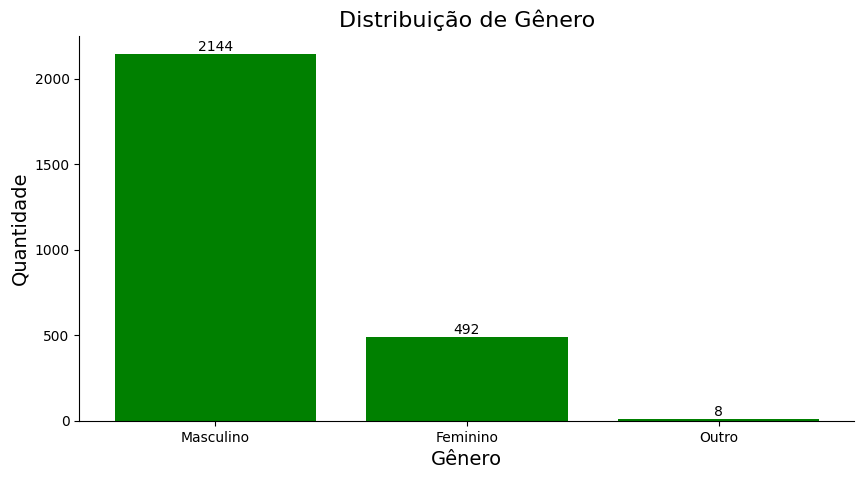

In [64]:
# Contar a quantidade de cada gênero
gender_counts = dt['Gênero'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(gender_counts.index, gender_counts.values, color='green')

# Adicionar títulos e rótulos
plt.title('Distribuição de Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Adicionar rótulos de dados em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

# Remover bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar o gráfico
plt.show()


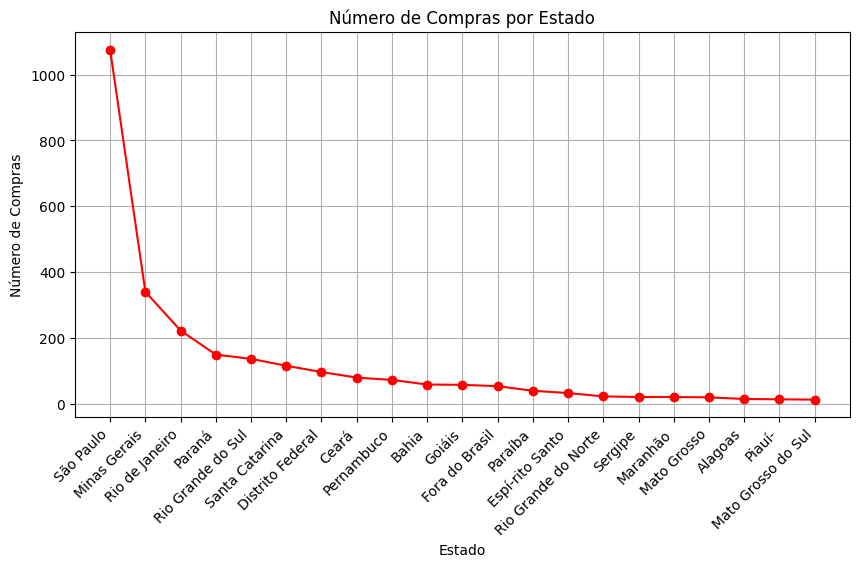

In [65]:
# Contar a quantidade de compras por estado
compras_por_estado = dt[dt['Comprou'] == 1]['Estado onde mora'].value_counts()

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(compras_por_estado.index, compras_por_estado.values, marker='o', color='red', linestyle='-')

# Adicionar títulos e rótulos
plt.title('Número de Compras por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Compras')

# Adicionar fundo quadriculado
plt.grid(True)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.show()


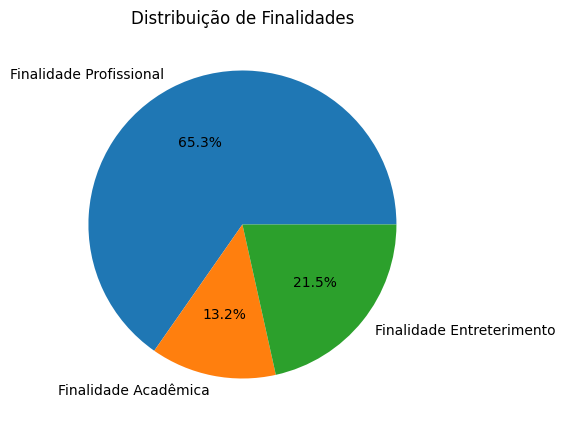

In [59]:
# Somar a quantidade de cada finalidade
finalidade_profissional = dt['Finalidade Profissional'].sum()
finalidade_academica = dt['Finalidade Acadêmica'].sum()
finalidade_entretenimento = dt['Finalidade Entreterimento'].sum()

# Criar uma lista com os valores e os rótulos
values = [finalidade_profissional, finalidade_academica, finalidade_entretenimento]
labels = ['Finalidade Profissional', 'Finalidade Acadêmica', 'Finalidade Entreterimento']

# Criar o gráfico de pizza
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Adicionar título
plt.title('Distribuição de Finalidades')

# Mostrar o gráfico
plt.show()
